Preparation

In [ ]:
from google.colab import drive # mounting the drive containing files used for the analysis
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install factor_analyzer # installing the module needed for PCA tests
!pip install git+https://github.com/SCCabanillas/scikit-learn.git # installing external implementation for normalized stress function (MDS)

In [ ]:
import nibabel as nib # to work with NIfTI files
import numpy as np # to work with arrays
import pandas as pd # to build data frames and work with them
import matplotlib.pyplot as plt # to build matrices and work with them
from sklearn.manifold import MDS # importing MDS class to use the MDS algorithm implemented
from sklearn.decomposition import PCA, FastICA # importing PCA class and FastICA class to use the algorithms implemented
import plotly.express as px # to plot results
from pylab import figure # to manipulate figures
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo # to perform PCA tests

plt.rcParams.update({'font.size':16}) # for aesthetics purposes 

The Process of Building the Dissimilarity Matrix

In [ ]:
def toVector(filename): # function that vectorize voxel matrices in NIfTI files
    img = nib.load(filename)
    data = img.get_fdata()
    flat = data.flatten()
    return flat

In [ ]:
mask_raw = toVector('/content/drive/My Drive/DMN (tesi)/DATA/colin_tlrc_2x2x2.nii') # importing colin 2x2x2 mask and vectorizing it
mask = (lambda a : a > 0)(mask_raw) # converting mask into binary map

In [ ]:
TID = toVector('/content/drive/My Drive/DMN (tesi)/DATA/Laird_C05_1k_ALE.nii') # vectorizing activation maps using toVector function
ToM = toVector('/content/drive/My Drive/DMN (tesi)/DATA/ToM_C05_1k_ALE.nii')
Em_Ind = toVector('/content/drive/My Drive/DMN (tesi)/DATA/Emotion Induction_C05_1k_ALE.nii')
Mon = toVector('/content/drive/My Drive/DMN (tesi)/DATA/Monitor_C05_1k_ALE.nii')
Epi_Rec = toVector('/content/drive/My Drive/DMN (tesi)/DATA/Episodic Recall_C05_1k_ALE.nii')
Reward = toVector('/content/drive/My Drive/DMN (tesi)/DATA/Reward_C05_1k_ALE.nii')
Im_Obj = toVector('/content/drive/My Drive/DMN (tesi)/DATA/Imagined Objects_C05_1k_ALE.nii')
Dec = toVector('/content/drive/My Drive/DMN (tesi)/DATA/Deception_C05_1k_ALE.nii')
Self = toVector('/content/drive/My Drive/DMN (tesi)/DATA/Self_Reflection_C05_1k_ALE.nii')

TID = TID[mask] # applying binary map on vectorized activation maps
ToM = ToM[mask]
Em_Ind = Em_Ind[mask]
Mon = Mon[mask]
Epi_Rec = Epi_Rec[mask]
Reward = Reward[mask]
Im_Obj = Im_Obj[mask]
Dec = Dec[mask]
Self = Self[mask]

In [ ]:
MegaMatrix = np.vstack((TID, # stacking vectorized activation maps together
                        ToM,
                        Em_Ind,
                        Mon,
                        Epi_Rec,
                        Reward,
                        Im_Obj,
                        Dec,
                        Self))
CorrelationMatrix = np.corrcoef(MegaMatrix) # computing correlation matrix from MegaMatrix

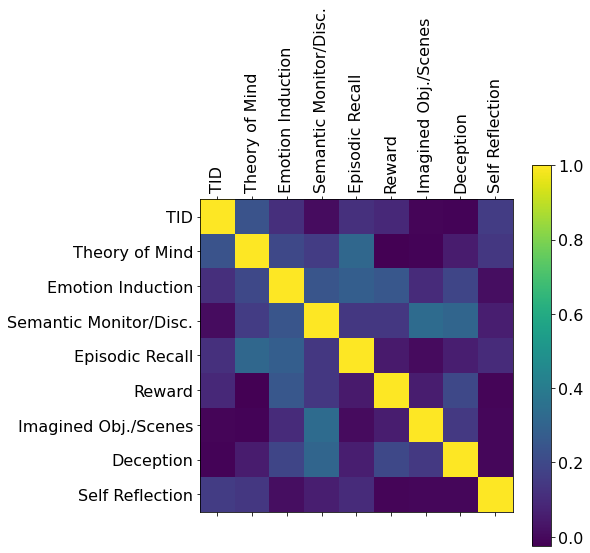

In [ ]:
labels = ['TID',
          'Theory of Mind',
          'Emotion Induction',
          'Semantic Monitor/Disc.',
          'Episodic Recall',
          'Reward',
          'Imagined Obj./Scenes',
          'Deception',
          'Self Reflection'
]
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
cax = ax.matshow(CorrelationMatrix)
fig.colorbar(cax)
ax.set_xticklabels(['']+labels,rotation = 'vertical')
ax.set_yticklabels(['']+labels)
plt.show() # graphing CorrelationMatrix

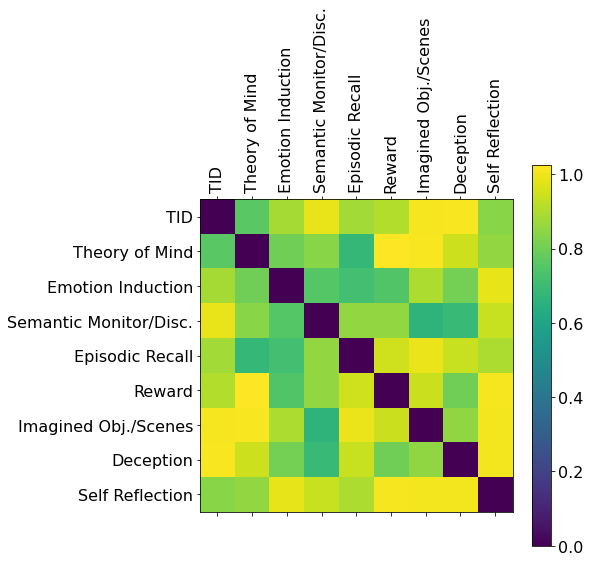

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
DissimilarityMatrix = 1 - CorrelationMatrix # computing dissimilarity matrix from correlation matrix
cax = ax.matshow(DissimilarityMatrix)
fig.colorbar(cax)
ax.set_xticklabels(['']+labels,rotation = 'vertical')
ax.set_yticklabels(['']+labels)
plt.show() # graphing DissimilarityMatrix

Multidimensional Scaling

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:261: UserWarning:

Explicit initial positions passed: performing only one init of the MDS instead of 4



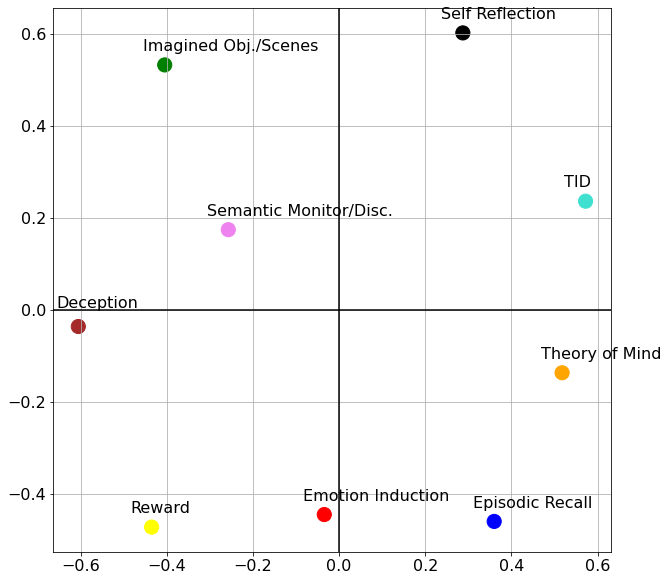

In [ ]:
from sklearn.manifold import MDS # importing MDS class to use the implemented MDS algorithm
pca = PCA(n_components=2) # PCA to initialize 2D MDS
pos = pca.fit_transform(DissimilarityMatrix)
mds = MDS(n_components=2,max_iter=1000,n_jobs=-1,dissimilarity='precomputed')
points = mds.fit_transform(DissimilarityMatrix,init=pos)
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111)
colors = ('turquoise','orange','red','violet','blue','yellow','green','brown','black')
ax.scatter(points[:,0],points[:,1],c=colors, s=200)
for i in range (0,9): # for aesthetics purposes
  if i<7 or i>7:
    ax.annotate(labels[i],(points[i,0],points[i,1]),xytext=(points[i,0]-0.05,points[i,1]+0.03))
  else: ax.annotate(labels[i],(points[i,0],points[i,1]),xytext=(points[i,0]-0.05,points[i,1]+0.04))
plt.grid()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

In [ ]:
pca = PCA(n_components=3) # PCA to initialize 3D MDS
pos = pca.fit_transform(DissimilarityMatrix)
mds = MDS(n_components=3,max_iter=1000,n_jobs=-1,dissimilarity='precomputed')
points = mds.fit_transform(DissimilarityMatrix,init=pos)
fig = px.scatter_3d(x=points[:,0], y=points[:,1], z=points[:,2],color=labels,text=labels,template='none')
for trace in fig.data:
  trace.name = trace.name.split('=')[1]
fig.update_traces(textfont_size=14, selector=dict(type='scatter3d'))
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:261: UserWarning:

Explicit initial positions passed: performing only one init of the MDS instead of 4



In [ ]:
a = [[67.39,48.71,56.03,43.32,58.76,65.45,48.09,45.25,71.02],[100.24,104.28,119.40,110.46,128.43,126.50,116.12,119.06,70.95],
     [82.91,77.84,68.76,77.00,70.82,73.11,95.33,85.85,93.51]]
Co_let = np.array(a) 

for i in range(0,20):
  pca = PCA(n_components=3, svd_solver= 'randomized')
  pos = pca.fit_transform(DissimilarityMatrix)
  mds = MDS(n_components=3,max_iter=100,n_jobs=-1,dissimilarity='precomputed', normalize= True)
  points = mds.fit_transform(DissimilarityMatrix,init=pos)
  stress = mds.stress_
  Co_mds = mds.embedding_ 
  pearson = np.corrcoef(Co_let,Co_mds.T) 
  corr_xx = pearson[0][3]  
  corr_yz = pearson[1][5]
  corr_zy = pearson[2][4]

  data1 = {'Stress': [stress], 'Corr_xx': [corr_xx],'Corr_yz':[corr_yz], 'Corr_zy':[corr_zy]} # creating csv files with normalized stress value and correlation
  df1 = pd.DataFrame(data1)  
  df2 = pd.DataFrame(Co_mds, columns=['Co_mds_x', 'Co_mds_y','Co_mds_z'])
  frames =[df1,df2]
  result = pd.concat(frames, axis = 1)
  result.to_csv('Iteration{}_pca_3D.csv'.format(i))

PCA Tests

In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(CorrelationMatrix)
print(chi_square_value, p_value)
kmo_all,kmo_model=calculate_kmo(CorrelationMatrix)
kmo_model

158.5475165941071 2.564328090421692e-17


/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



0.6066573767164228

Principal Component Analysis

In [ ]:
MegaMatrixT = np.transpose(MegaMatrix) # matrix dimension: 217044 x 9
pca = PCA()
Points1= pca.fit_transform(MegaMatrixT)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],index=labels)
loadings.to_csv('Matrix_of_loadings_9x9.csv') # creating csv with PCA loadings
explained_variance = pca.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(explained_variance))
from numpy import savetxt
savetxt('explained_variance.csv', explained_variance, delimiter=',')

Explained variation per principal component: [5.17649676e-01 3.04894879e-01 1.00794330e-01 3.95371482e-02
 2.21778688e-02 5.97763552e-03 4.45862108e-03 4.21752890e-03
 2.92312055e-04]


Conversion into NIfTI Files

In [ ]:
pca = PCA(n_components = 4) # PCA
pck = pca.fit_transform(MegaMatrixT)
Img = nib.load('/content/drive/My Drive/DMN (tesi)/DATA/colin_tlrc_2x2x2.nii')
for k in range(1,5):
  PCK = pck[:,k-1] 
  TruePCK = np.zeros(537600, dtype=np.float32)
  t = 0
  for i in range(537600):
    if mask[i]==0:
      TruePCK[i]=0
    else:
      TruePCK[i]= PCK[t]
      t = t + 1
  PCK = np.reshape(TruePCK, (80,96,70))
  hdc = Img.header
  hdc["cal_max"] = np.max(TruePCK)
  hdc["cal_min"] = np.min(TruePCK)
  imgK = nib.Nifti1Image(PCK, None, header = Img.header)
  nib.save(imgK, 'PC{}_Colin.nii'.format(k))

In [ ]:
for s in range(2,6): # ICA to get NIfTI files and nx9 matrices 
  ica = FastICA(n_components = s)
  ick = ica.fit_transform(MegaMatrixT)
  Img = nib.load('/content/drive/My Drive/DMN (tesi)/DATA/colin_tlrc_2x2x2.nii')
  for k in range(1,s+1):
    ICK = ick[:,k-1] 
    TrueICK = np.zeros(537600, dtype=np.float32)
    t = 0
    for i in range(537600):
      if mask[i]==0:
        TrueICK[i]=0
      else:
        TrueICK[i]= ICK[t]
        t = t + 1
    ICK = np.reshape(TrueICK, (80,96,70))
    hdc = Img.header
    hdc["cal_max"] = np.max(TrueICK)
    hdc["cal_min"] = np.min(TrueICK)
    imgK = nib.Nifti1Image(ICK, None, header = Img.header)
    nib.save(imgK, 'IC{}_{}_Colin.nii'.format(s,k))
  loadings = pd.DataFrame(ica.components_, columns = labels)
  loadings
  loadings.to_csv('Unmixing_Matrix_{}x9.csv'.format(s))